# NLP - Yelp Reviews

For this project we'll use NLP to classify Yelp Reviews into either 1 star or 5 star categories based off the text content. We'll utilize pipeline for more complex tasks. We'll use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each point in the dataset is a review on a business by a user. The 'stars' column is the number of stars assigned by the reviewer to the business. All reviews have 'cool' votes which is the rating of the review itself, not a rating for the business. The 'useful' and 'funny' columns are similar to  the 'cool' column. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [17]:
yelp[yelp['funny']==5].loc[7917]['text']

'So, not following my own advice (ahem, NEVER RETURN), I returned here for a friend\'s birthday dinner a few months ago (I super love this person so how could I say no?). HA! Big mistake. Also, fair warning: there are several-a-CAPS-LOCK ahead.\n\nThe only pleasant thing about the evening was the reservation and seating were right on time for our large group (15 people). And of course because we were celebrating a super special person.\n\nI\'ll keep this update short and sweet:\n\n$3 for a CAN OF SODA? Get real. I knew it\'d be overpriced but I was at least expecting a mini bottle or something. But a can? COME ON. You bought that in bulk and paid .03342 cents for it. FAIL.\n\nYour servers: IDIOTS. First it takes our server 15 minutes to come around the first time and take drink orders. Then she\'s back another 15 minutes after that taking the orders again. Did you forget? Were you not paying attention the first time we around? Why did it take 30 minutes just to order drinks? And on top

This is an example of what a review's text looks like.

In [19]:
yelp['text length'] = yelp['text'].apply(len)

In [20]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# Exploratory Data Analysis

In [21]:
sns.set_style('white')

<Figure size 720x432 with 0 Axes>

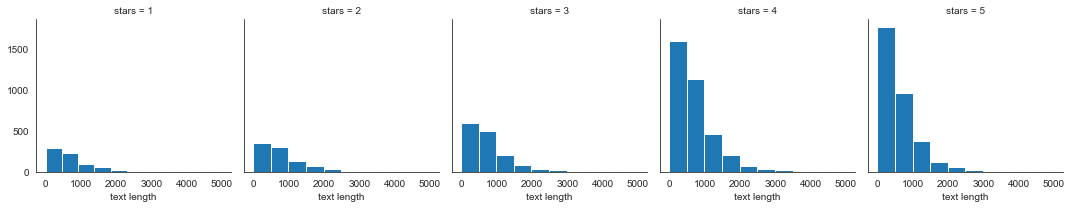

In [23]:
graph = sns.FacetGrid(yelp,col='stars')
graph.map(plt.hist, 'text length')

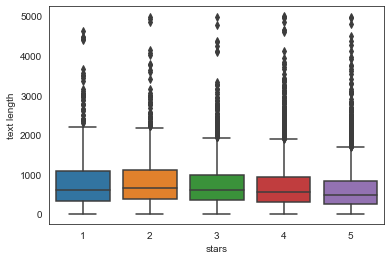

In [25]:
sns.boxplot(x='stars',y='text length', data=yelp)

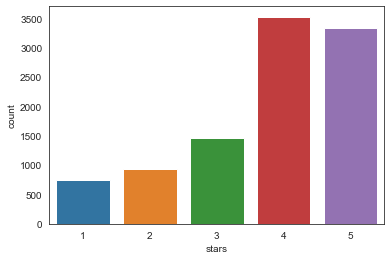

In [27]:
sns.countplot(x='stars', data=yelp)

There are significantly more 4 and 5 star reviews than 1,2 and 3 stars. The avg length for the reviews are all about the same.

In [34]:
stars = yelp.groupby('stars').mean()

In [35]:
stars.head()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [36]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


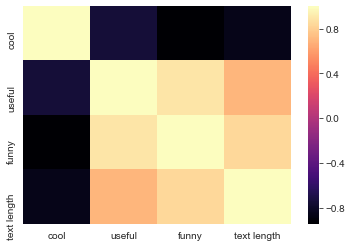

In [39]:
sns.heatmap(data=stars.corr(),cmap='magma')

There's very little correlation between cool and the other features.

# NLP Classification
Let's only grab reviews that are only either 1 star or 5 stars.

In [54]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)] 

In [55]:
yelp_class[yelp_class['stars']==5].head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [56]:
X = yelp_class['text']
y = yelp_class['stars']

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
yelp_transformer = CountVectorizer()

In [59]:
X = yelp_transformer.fit_transform(X)

# Train Test Split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
nb = MultinomialNB()

In [71]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Predictions and Evaluations

In [74]:
pred = nb.predict(X_test)

In [73]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.84      0.60      0.70       215
           5       0.92      0.98      0.95      1011

    accuracy                           0.91      1226
   macro avg       0.88      0.79      0.83      1226
weighted avg       0.91      0.91      0.91      1226



Great we were able to correctly predict whether a text review was 1 star or 5 star with 91% accuracy. Let's try to include TF-IDF to this process using a pipeline.

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer

In [77]:
from sklearn.pipeline import Pipeline

In [78]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [79]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [80]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [82]:
pred = pipeline.predict(X_test)

In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       239
           5       0.81      1.00      0.89       987

    accuracy                           0.81      1226
   macro avg       0.40      0.50      0.45      1226
weighted avg       0.65      0.81      0.72      1226



C:\Users\markb\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


So on an interesting note, Tf-idf actually made things worse!